### Importando bibliotecas:

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [55]:
%matplotlib inline

### Lendo arquivo 'train.csv':

In [56]:
df_train = pd.read_csv('train.csv')

df_train.drop(['Unnamed: 0'], axis=1, inplace = True)

### Dados do arquivo 'train.csv':

In [57]:
df_train.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,...,5.0,A,A,A,A,A,A,A,B,D
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,...,NaN,A,A,C,A,B,A,A,C,A
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,3,...,NaN,A,A,A,A,C,A,A,B,A
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,0,...,5.0,C,A,A,A,A,D,A,A,A
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,2,...,NaN,A,A,A,A,A,A,A,A,A


In [58]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Columns: 166 entries, NU_INSCRICAO to Q050
dtypes: float64(28), int64(78), object(60)
memory usage: 17.4+ MB


In [59]:
df_train.describe()

,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,...,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041
count,13730.0,1.373000e+04,13730.000000,13730.000000,13202.000000,13730.000000,13730.000000,1.312100e+04,13121.000000,13730.000000,...,6354.000000,6354.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,2938.000000
mean,2016.0,3.088548e+06,30.736708,21.593809,0.116043,2.185652,1.048871,3.057946e+06,30.429159,1.782666,...,4.530217,3.962858,4.645594,4.678441,3.341515,4.458995,3.724618,3.506409,4.442098,3.671545
std,0.0,9.890495e+05,9.862405,7.043654,0.365986,1.007285,0.258895,9.703020e+05,9.670030,0.880734,...,1.027613,1.625356,0.920998,0.865039,1.711930,1.200172,1.689362,1.718858,1.181549,1.746444
min,2016.0,1.100023e+06,11.000000,13.000000,0.000000,0.000000,0.000000,1.100023e+06,11.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.0,2.307650e+06,23.000000,17.000000,0.000000,1.000000,1.000000,2.306900e+06,23.000000,1.000000,...,5.000000,3.000000,5.000000,5.000000,2.000000,5.000000,3.000000,2.000000,4.000000,3.000000
50%,2016.0,3.118601e+06,31.000000,19.000000,0.000000,3.000000,1.000000,3.106200e+06,31.000000,2.000000,...,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000
75%,2016.0,3.550308e+06,35.000000,23.000000,0.000000,3.000000,1.000000,3.549805e+06,35.000000,2.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,2016.0,5.300108e+06,53.000000,67.000000,3.000000,5.000000,4.000000,5.300108e+06,53.000000,4.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


#### Substituindo NaN pela média geral das notas:

Tirando a média geral sem alteração:

In [60]:
#notas = df_train['NU_NOTA_MT']
#media = notas.mean()
#media

Substituindo NaN pela média:

In [61]:
#df_train['NU_NOTA_MT'] = notas.fillna(value = media)
#df_train['NU_NOTA_MT']

### Observando a correlação entre os dados:

In [62]:
corr_total = df_train.corr()
corr_total

,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,...,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041
NU_ANO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CO_MUNICIPIO_RESIDENCIA,NaN,1.000000,0.999865,-0.002296,0.020813,-0.236178,0.009710,0.865294,0.865216,0.025402,...,0.004115,-0.030114,-0.050304,-0.050138,-0.040668,-0.013479,-0.032710,-0.094862,-0.077456,-0.033205
CO_UF_RESIDENCIA,NaN,0.999865,1.000000,-0.002017,0.020947,-0.234786,0.009433,0.864791,0.864919,0.025822,...,0.003968,-0.030345,-0.050096,-0.049292,-0.040688,-0.013647,-0.032467,-0.094113,-0.076838,-0.033149
NU_IDADE,NaN,-0.002296,-0.002017,1.000000,0.533462,0.009675,-0.017713,-0.030711,-0.030259,-0.253403,...,-0.044791,0.025077,-0.030681,0.012739,0.021949,-0.003569,-0.035306,-0.069973,-0.010988,0.160526
TP_ESTADO_CIVIL,NaN,0.020813,0.020947,0.533462,1.000000,0.004950,-0.012160,-0.000046,0.000243,-0.099077,...,-0.017455,-0.009670,-0.016354,-0.002580,0.025840,0.002294,-0.014725,-0.066346,-0.022736,0.108771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q037,NaN,-0.013479,-0.013647,-0.003569,0.002294,0.086642,0.032588,-0.024174,-0.024201,0.001767,...,0.220839,0.225791,0.245757,0.202230,0.387722,1.000000,0.496678,0.254418,0.270380,0.187921
Q038,NaN,-0.032710,-0.032467,-0.035306,-0.014725,0.069298,0.024112,-0.038666,-0.038305,0.080592,...,0.159887,0.223508,0.215767,0.142610,0.378421,0.496678,1.000000,0.374424,0.259947,0.219529
Q039,NaN,-0.094862,-0.094113,-0.069973,-0.066346,0.046830,0.011327,-0.097273,-0.096666,0.019877,...,0.144264,0.206979,0.189252,0.225724,0.270343,0.254418,0.374424,1.000000,0.305357,0.262031
Q040,NaN,-0.077456,-0.076838,-0.010988,-0.022736,0.053556,0.014847,-0.081490,-0.080963,0.051951,...,0.215292,0.176028,0.243190,0.179292,0.177025,0.270380,0.259947,0.305357,1.000000,0.306438


In [63]:
corr_total['NU_NOTA_MT']

NU_ANO                          NaN
CO_MUNICIPIO_RESIDENCIA    0.108850
CO_UF_RESIDENCIA           0.107493
NU_IDADE                  -0.061485
TP_ESTADO_CIVIL           -0.035393
                             ...   
Q037                      -0.265249
Q038                      -0.202259
Q039                      -0.019360
Q040                      -0.119997
Q041                      -0.131795
Name: NU_NOTA_MT, Length: 106, dtype: float64

In [100]:
corr_total >=0.3

,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,...,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041
NU_ANO,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
CO_MUNICIPIO_RESIDENCIA,False,True,True,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
CO_UF_RESIDENCIA,False,True,True,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
NU_IDADE,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
TP_ESTADO_CIVIL,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q037,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,False,False,False
Q038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
Q039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,False
Q040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True


In [104]:
a = (corr_total['NU_NOTA_MT']>= 0.3)


NU_ANO                     False
CO_MUNICIPIO_RESIDENCIA    False
CO_UF_RESIDENCIA           False
NU_IDADE                   False
TP_ESTADO_CIVIL            False
                           ...  
Q037                       False
Q038                       False
Q039                       False
Q040                       False
Q041                       False
Name: NU_NOTA_MT, Length: 106, dtype: bool

In [106]:
a[a==True].index

Index(['TP_DEPENDENCIA_ADM_ESC', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO'],
      dtype='object')

### *Selecionando os melhores dados para trabalhar

In [90]:
melhores_corr = df_train[['NU_NOTA_MT','NU_NOTA_CH','NU_NOTA_CN','NU_NOTA_LC','NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5','NU_NOTA_REDACAO']]
melhores_corr

,NU_NOTA_MT,NU_NOTA_CH,NU_NOTA_CN,NU_NOTA_LC,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,399.4,495.4,436.3,581.2,120.0,120.0,120.0,80.0,80.0,520.0
1,459.8,544.1,474.5,599.0,140.0,120.0,120.0,120.0,80.0,580.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
13725,403.2,419.7,438.2,394.5,120.0,120.0,80.0,80.0,40.0,440.0
13726,452.4,557.9,423.8,533.0,120.0,120.0,120.0,120.0,80.0,560.0
13727,398.0,528.9,460.5,569.3,120.0,120.0,120.0,120.0,120.0,600.0
13728,386.6,621.7,422.5,569.0,100.0,100.0,80.0,80.0,100.0,460.0


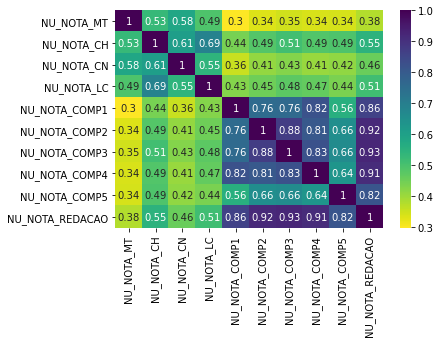

In [91]:
sns.heatmap(melhores_corr.corr(), cmap = 'viridis_r', annot = True)

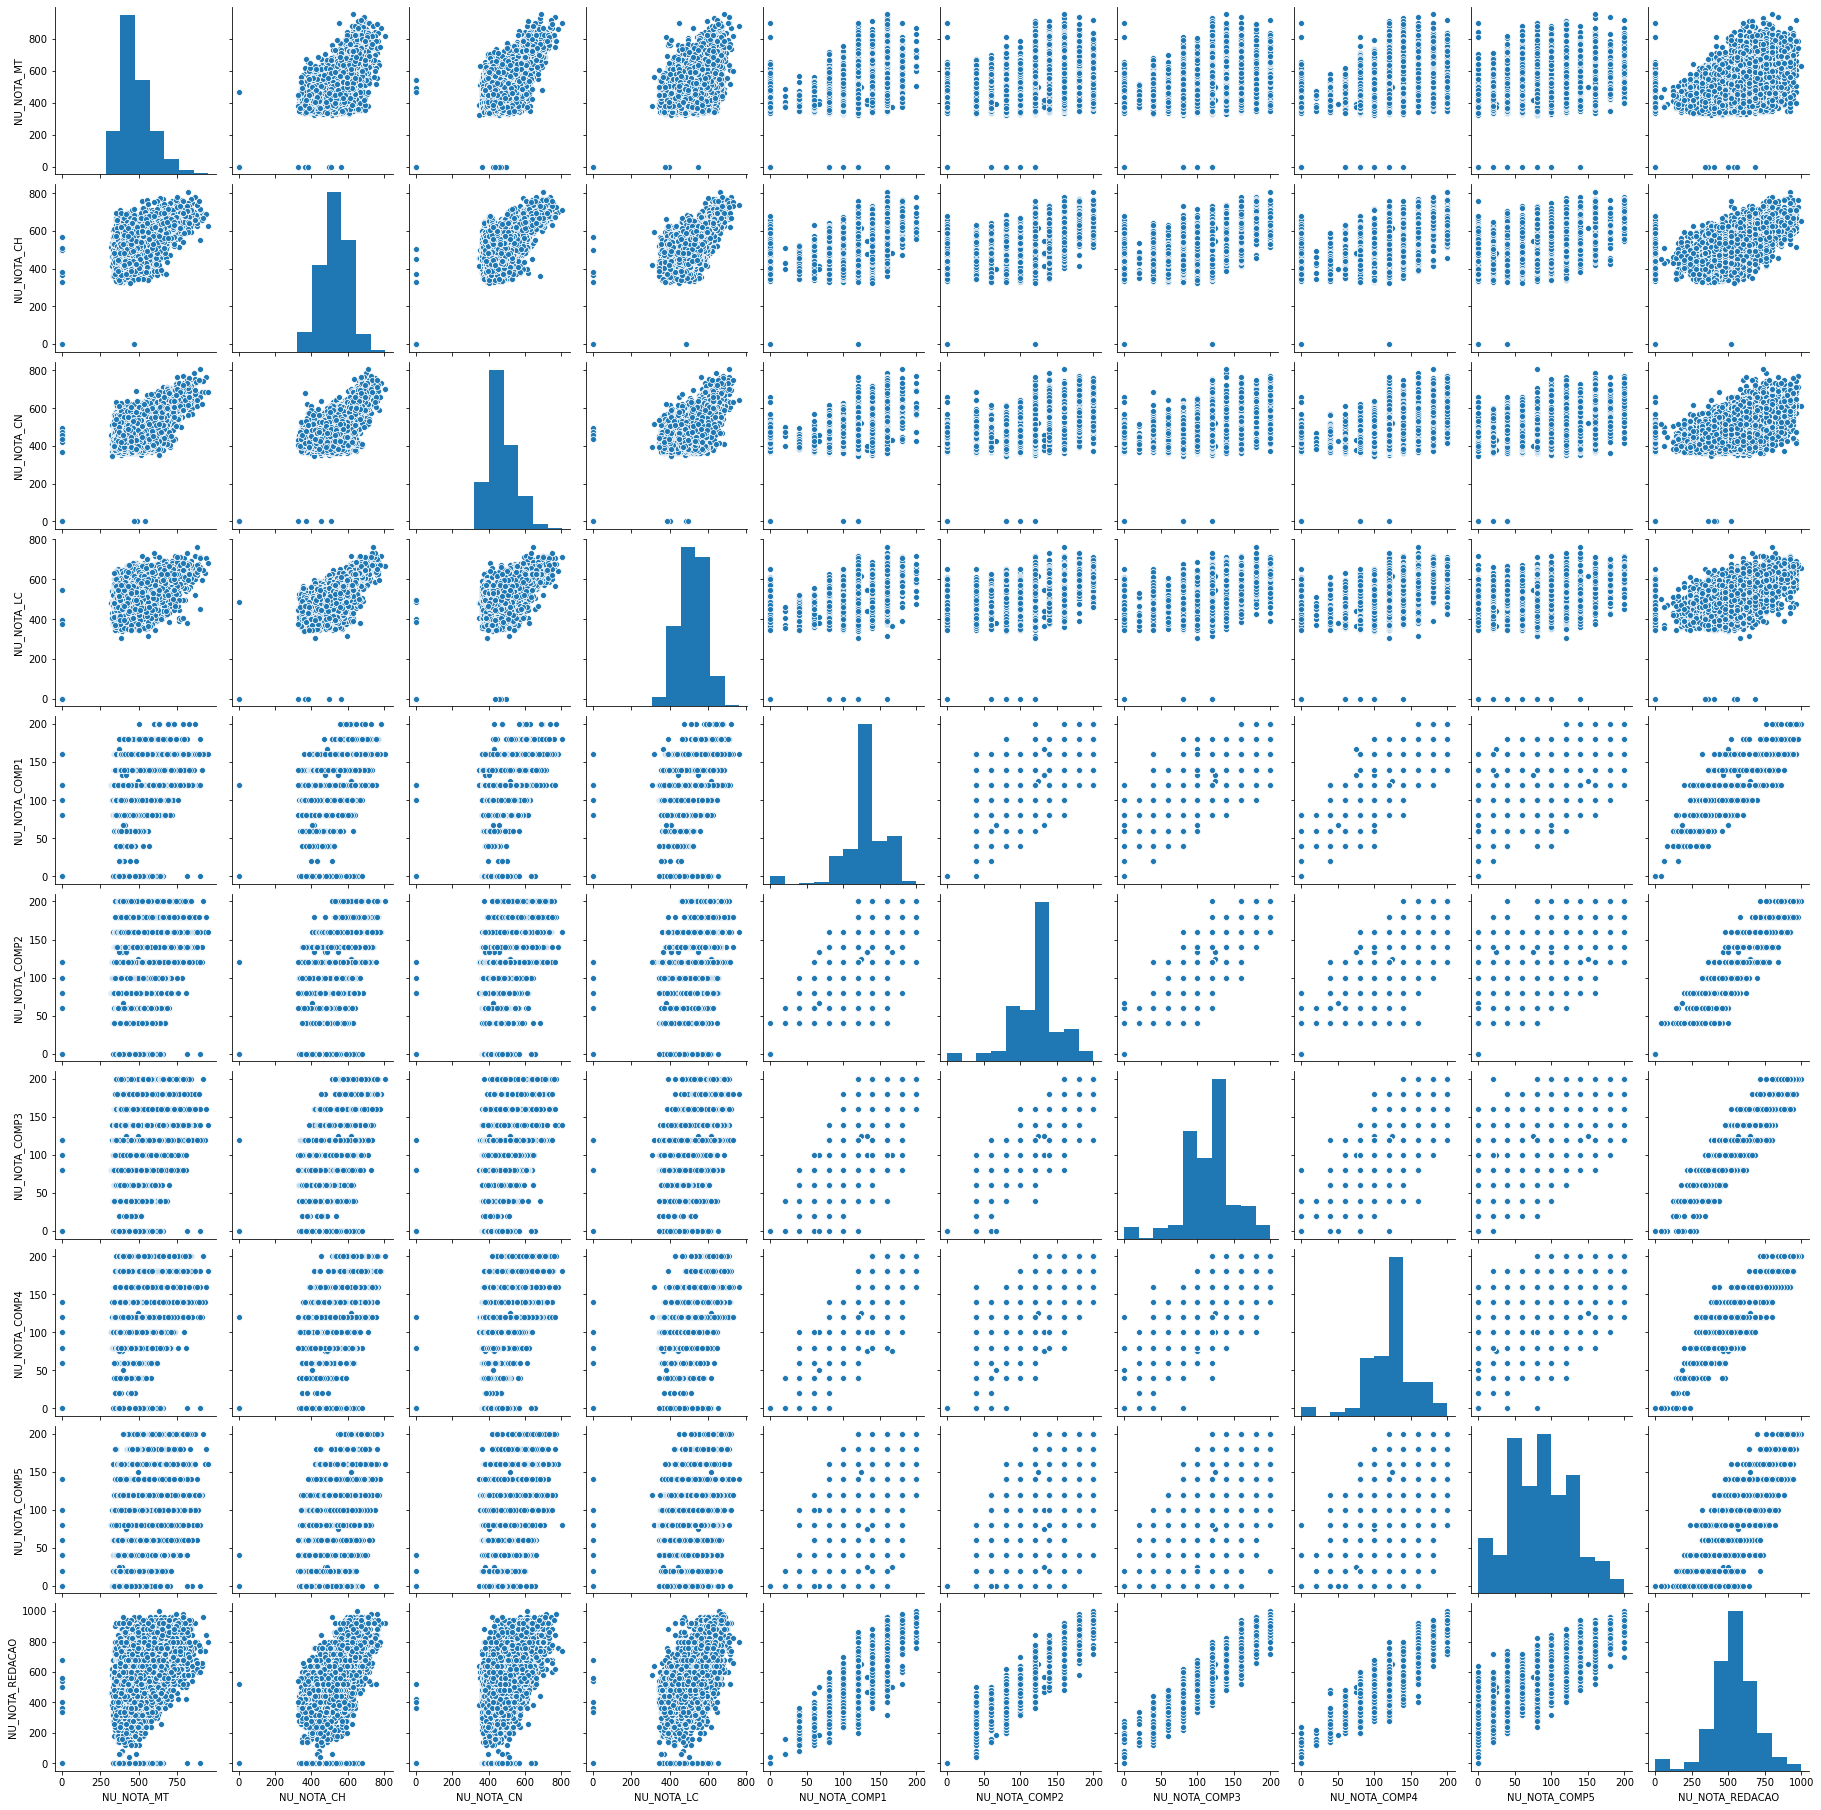

In [32]:
sns.pairplot(melhores_corr)

### Analisando dados faltantes:

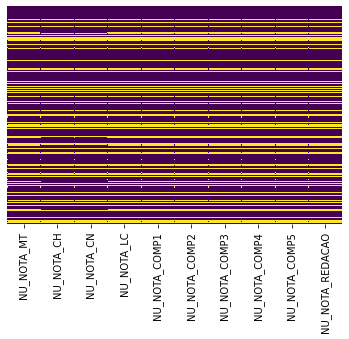

In [92]:
sns.heatmap(melhores_corr.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [93]:
melhores_corr.isnull().sum()

NU_NOTA_MT         3597
NU_NOTA_CH         3389
NU_NOTA_CN         3389
NU_NOTA_LC         3597
NU_NOTA_COMP1      3597
NU_NOTA_COMP2      3597
NU_NOTA_COMP3      3597
NU_NOTA_COMP4      3597
NU_NOTA_COMP5      3597
NU_NOTA_REDACAO    3597
dtype: int64

In [107]:
melhores_corr.fillna(0).corr()

,NU_NOTA_MT,NU_NOTA_CH,NU_NOTA_CN,NU_NOTA_LC,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
NU_NOTA_MT,1.000000,0.903608,0.907039,0.943954,0.882746,0.862709,0.854946,0.866827,0.722275,0.875929
NU_NOTA_CH,0.903608,1.000000,0.969323,0.934704,0.877637,0.857895,0.850698,0.860898,0.719970,0.871199
NU_NOTA_CN,0.907039,0.969323,1.000000,0.920917,0.864529,0.845978,0.837947,0.848201,0.706057,0.857810
NU_NOTA_LC,0.943954,0.934704,0.920917,1.000000,0.917661,0.891824,0.883205,0.896716,0.736902,0.904795
NU_NOTA_COMP1,0.882746,0.877637,0.864529,0.917661,1.000000,0.942819,0.938204,0.959026,0.788569,0.968156
NU_NOTA_COMP2,0.862709,0.857895,0.845978,0.891824,0.942819,1.000000,0.965976,0.951199,0.828269,0.979367
NU_NOTA_COMP3,0.854946,0.850698,0.837947,0.883205,0.938204,0.965976,1.000000,0.953317,0.833303,0.979547
NU_NOTA_COMP4,0.866827,0.860898,0.848201,0.896716,0.959026,0.951199,0.953317,1.000000,0.819962,0.978794
NU_NOTA_COMP5,0.722275,0.719970,0.706057,0.736902,0.788569,0.828269,0.833303,0.819962,1.000000,0.885568
NU_NOTA_REDACAO,0.875929,0.871199,0.857810,0.904795,0.968156,0.979367,0.979547,0.978794,0.885568,1.000000


In [97]:
drop = melhores_corr.dropna().corr()
drop

,NU_NOTA_MT,NU_NOTA_CH,NU_NOTA_CN,NU_NOTA_LC,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
NU_NOTA_MT,1.000000,0.529594,0.584941,0.492031,0.299811,0.335441,0.350556,0.342629,0.343998,0.379891
NU_NOTA_CH,0.529594,1.000000,0.611573,0.692988,0.443809,0.488050,0.510452,0.488797,0.494798,0.550582
NU_NOTA_CN,0.584941,0.611573,1.000000,0.545667,0.357672,0.412894,0.429447,0.407747,0.416349,0.459938
NU_NOTA_LC,0.492031,0.692988,0.545667,1.000000,0.431546,0.453135,0.475782,0.468100,0.443357,0.513982
NU_NOTA_COMP1,0.299811,0.443809,0.357672,0.431546,1.000000,0.755549,0.758445,0.823696,0.557588,0.862036
NU_NOTA_COMP2,0.335441,0.488050,0.412894,0.453135,0.755549,1.000000,0.874899,0.807150,0.655358,0.917915
NU_NOTA_COMP3,0.350556,0.510452,0.429447,0.475782,0.758445,0.874899,1.000000,0.826533,0.663832,0.925552
NU_NOTA_COMP4,0.342629,0.488797,0.407747,0.468100,0.823696,0.807150,0.826533,1.000000,0.634410,0.914132
NU_NOTA_COMP5,0.343998,0.494798,0.416349,0.443357,0.557588,0.655358,0.663832,0.634410,1.000000,0.816160
NU_NOTA_REDACAO,0.379891,0.550582,0.459938,0.513982,0.862036,0.917915,0.925552,0.914132,0.816160,1.000000


In [109]:
#melhores_corr.corr()

,NU_NOTA_MT,NU_NOTA_CH,NU_NOTA_CN,NU_NOTA_LC,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
NU_NOTA_MT,1.000000,0.521916,0.578046,0.494695,0.299402,0.335638,0.350307,0.342282,0.343337,0.379376
NU_NOTA_CH,0.521916,1.000000,0.609543,0.692988,0.443809,0.488050,0.510452,0.488797,0.494798,0.550582
NU_NOTA_CN,0.578046,0.609543,1.000000,0.545667,0.357672,0.412894,0.429447,0.407747,0.416349,0.459938
NU_NOTA_LC,0.494695,0.692988,0.545667,1.000000,0.430603,0.453262,0.475390,0.467356,0.441696,0.512908
NU_NOTA_COMP1,0.299402,0.443809,0.357672,0.430603,1.000000,0.756664,0.759452,0.824538,0.558587,0.862744
NU_NOTA_COMP2,0.335638,0.488050,0.412894,0.453262,0.756664,1.000000,0.875447,0.808006,0.655915,0.918278
NU_NOTA_COMP3,0.350307,0.510452,0.429447,0.475390,0.759452,0.875447,1.000000,0.827151,0.664350,0.925813
NU_NOTA_COMP4,0.342282,0.488797,0.407747,0.467356,0.824538,0.808006,0.827151,1.000000,0.635018,0.914505
NU_NOTA_COMP5,0.343337,0.494798,0.416349,0.441696,0.558587,0.655915,0.664350,0.635018,1.000000,0.816248
NU_NOTA_REDACAO,0.379376,0.550582,0.459938,0.512908,0.862744,0.918278,0.925813,0.914505,0.816248,1.000000


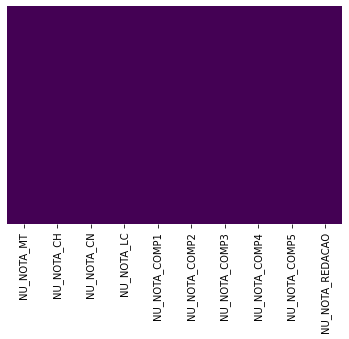

In [98]:
sns.heatmap(drop.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Treinando modelos de regressão:

In [129]:
y = df_train.dropna()['NU_NOTA_MT']

In [113]:
X = df_train.dropna()[['NU_NOTA_MT','NU_NOTA_CH','NU_NOTA_CN','NU_NOTA_LC','NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5','NU_NOTA_REDACAO']]

### Split treino:

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size = 0.3)

### Criando e treinando modelo:

In [116]:
from sklearn.linear_model import LinearRegression

In [117]:
lm = LinearRegression()

In [118]:
lm.fit(X_train, y_train)

LinearRegression()

### Avaliando modelo

In [119]:
print(lm.intercept_)

-4.547473508864641e-13


In [120]:
pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])

,Coefficient
NU_NOTA_MT,1.000000e+00
NU_NOTA_CH,2.328141e-16
NU_NOTA_CN,1.948213e-16
NU_NOTA_LC,1.828682e-16
NU_NOTA_COMP1,-1.166063e-16
NU_NOTA_COMP2,-5.396600e-17
NU_NOTA_COMP3,-1.041448e-16
NU_NOTA_COMP4,3.892103e-17
NU_NOTA_COMP5,-2.025035e-16
NU_NOTA_REDACAO,-4.628782e-16


### Predição do modelo:

In [121]:
y_pred = lm.predict(X_test)

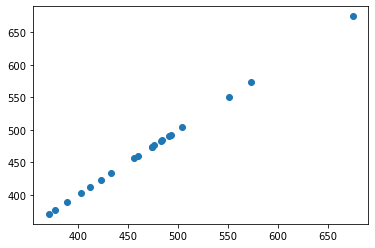

In [122]:
plt.scatter(y_test, y_pred)

Text(27.0, 0.5, 'Valores preditos')

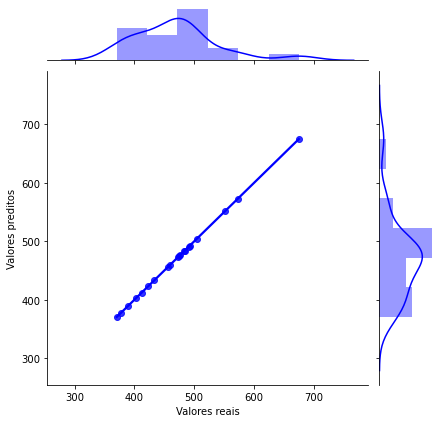

In [123]:
sns.jointplot(y_test, y_pred, kind = 'reg', color = 'b')
plt.xlabel('Valores reais')
plt.ylabel('Valores preditos')

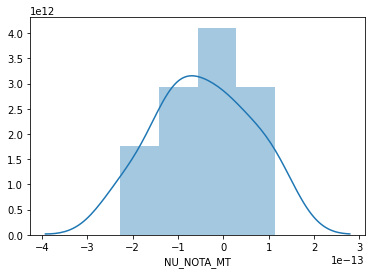

In [124]:
sns.distplot(y_test - y_pred)

In [125]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [126]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [127]:
print('MAE:', round(mae, 2))
print('MSE:', round(mse, 2))
print('RMSE:', round(rmse, 2))

MAE: 0.0
MSE: 0.0
RMSE: 0.0
